In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# 1. Delta Hedging

In [2]:
Share_Price = 80
p = 0.5
K = 79
S_up = 84
S_down = 76

V_up = max(S_up - K, 0)
V_down = max(S_down - K, 0)

By using the Delta Hedging, We aim to calculate the amount of share holding $\Delta$, such that 

$$ V^+ - \Delta S^+ = V^- - \Delta S^- $$

$$ \Delta = \frac{V^+ - V^-}{S^+ - S^-} $$

long a call, short $\Delta$ portion of Stocks.

In [3]:
delta = (V_up - V_down)/(S_up - S_down)

print('Call Option Value at S_up is:', V_up)
print('Call Option Value at S_down is:', V_down)
print('Delta is :', delta)
print(V_up - delta*S_up)
print(V_down - delta*S_down)

Call Option Value at S_up is: 5
Call Option Value at S_down is: 0
Delta is : 0.625
-47.5
-47.5


As we assume there is not interest rate here, $V - \Delta S = V^+ - \Delta S^+ = V^- - \Delta S^-$

$$ V =  V^+ - \Delta S^+  + S$$

In [4]:
V = V_up - delta * S_up + Share_Price *delta 
print('Value of Call Option in this case is :', V)
print(V_down - delta * S_down + Share_Price*delta)

Value of Call Option in this case is : 2.5
2.5


In [5]:
# P.S. might run through function
def option_call(S,K):
    return max(S-K, 0)

def delta_hedgeing(S_up, S_down, K):
    return (option_call(S_up, K) - option_call(S_down, K))/(S_up - S_down)

# 2. Binomial

In [6]:
Share_Price2 = 92
S_up2 = 98
S_down2 = 86
K2 = 90
rf = 0.02

In this case, interest rate is added. Still, we try to find $\Delta$, and discount the future value of the artificial portfolio with a long call and a short delta portion of stocks.

Then, calculate the present value of call option.

$$  V - \Delta S = e^{-r}\bigg( V^+ - \Delta S^+  \bigg)  $$

$$  V= e^{-r}\bigg( V^+ - \Delta S^+  \bigg)   + \Delta S $$

In [7]:
# Delta
delta2 = delta_hedgeing(S_up2, S_down2, K2)
print('Delta is :',delta2)

# PV of Call Option
V2 = np.exp(-rf) * (  option_call(S_up2, K2) - delta2 * S_up2  ) \
    + delta2*Share_Price2
print('Value of Call is:',V2)

Delta is : 0.6666666666666666
Value of Call is: 5.1352760637460335


# 3. 'Power' Option

In [8]:
def power_option_call(S,K):
    return max(S**2-K, 0)

def power_delta_hedgeing(S_up, S_down, K):
    return (power_option_call(S_up, K) - power_option_call(S_down, K))/(S_up - S_down)

In [9]:
Share_Price3 = 15
S_up3 = 17
S_down3 = 13
rf = 0
K3 = 159

# Delta
delta3 = power_delta_hedgeing(S_up3, S_down3, K3)
print('Delta is :',delta3)

# PV of Call Option
V3 = np.exp(-rf) * (  power_option_call(S_up3, K3) - delta3 * S_up3  ) \
    + delta3*Share_Price3
print('Value of Call is:',V3)

Delta is : 30.0
Value of Call is: 70.0


# 4. Risk-netural Prob

In [10]:
S_up4 = 92
S_down4 = 59
Share_Price4 = 75

u = S_up4 / Share_Price4
d = S_down4 / Share_Price4

p = (1 -d)/(u-d)
print(p)
print( (Share_Price4 - S_down4 ) / (S_up4 - S_down4))

0.48484848484848503
0.48484848484848486


# 5. Binary Call

In [11]:
K5 = 79
Share_Price5 = 80
S_up5 = 84
S_down5 = 76
rf = 0

def binary_call(S, E):
    if S>E:
        return 1
    else:
        return 0
    
def binary_delta_hedgeing(S_up, S_down, K):
    return (binary_call(S_up, K) - binary_call(S_down, K))/(S_up - S_down)

In [12]:
# Delta
delta5 = binary_delta_hedgeing(S_up5, S_down5, K5)
print('Delta is :',delta5)

# PV of Call Option
V5 = np.exp(-rf) * (  binary_call(S_up5, K5) - delta5 * S_up5  ) \
    + delta5*Share_Price5
print('Value of Call is:',V5)

Delta is : 0.125
Value of Call is: 0.5


# 6. Multi-Step Binomial

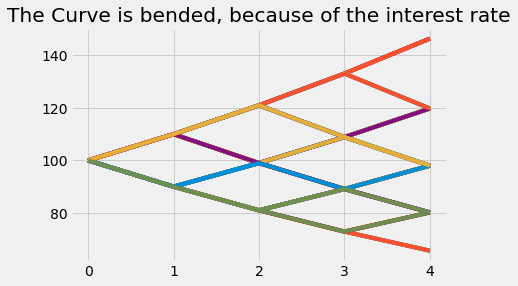

In [13]:
S = 100
r = 0.05 # e^r continuously compounding
E = 100 # strike price
T = 1
SD = 0.2 # given in the spreadsheet
TimeStep =4
dt = T/TimeStep



u = 1 + SD * np.sqrt(dt)
d = 1 - SD * np.sqrt(dt)
pp = (1 + r*dt - d)/(u-d)  # p'


N = 100

S_list_all = []
for i in range(N):
    S = 100
    S_list_each = [S]
    for j in range(TimeStep):
        S = S * np.random.choice([u,d])
        S_list_each.append(S)
    S_list_all.append(S_list_each)
    
Price_matrix = np.vstack(S_list_all)
Price_matrix = np.round(Price_matrix,2)
plt.figure()
plt.plot( Price_matrix.T )
plt.title('The Curve is bended, because of the interest rate')
plt.show()

In [14]:
Payoff_matrix = np.zeros(Price_matrix.shape)
Payoff_matrix = Price_matrix -100
Payoff_matrix = np.round(Payoff_matrix,2)
# plt.figure()
# plt.plot( Payoff_matrix.T )
# plt.title('Payoff Matrix')
# plt.show()

# reforming the payoff matrix

payoff_node = np.zeros([ len(np.unique(Payoff_matrix[:,4])),TimeStep+1])
# row is nodes number, col is timestep number
price_node = np.zeros([ len(np.unique(Price_matrix[:,4])),TimeStep+1])


for i in range(TimeStep,0,-1):
    sorted_payoff = np.sort(np.unique(Payoff_matrix[:,i]))
    sorted_price = np.sort(np.unique(Price_matrix[:,i]))
    payoff_node[0:len(sorted_payoff),i] = sorted_payoff
    price_node[0:len(sorted_price),i] = sorted_price
    
price_node[0,0] = Price_matrix[0,0]
print(payoff_node)
print(price_node)

[[  0.   -10.   -19.   -27.1  -34.39]
 [  0.    10.    -1.   -10.9  -19.81]
 [  0.     0.    21.     8.9   -1.99]
 [  0.     0.     0.    33.1   19.79]
 [  0.     0.     0.     0.    46.41]]
[[100.    90.    81.    72.9   65.61]
 [  0.   110.    99.    89.1   80.19]
 [  0.     0.   121.   108.9   98.01]
 [  0.     0.     0.   133.1  119.79]
 [  0.     0.     0.     0.   146.41]]


In [15]:
payoff_node = np.maximum(payoff_node,0)
v_node = np.zeros(price_node.shape)
v_node[:,TimeStep] = payoff_node[:,TimeStep]
for i in range(TimeStep,0,-1):
    for j in range((price_node[:,i]!=0).sum(),1,-1):
        s_down, s_up = price_node[j-2:j,i]
        v_down, v_up = v_node[j-2:j,i]

        delta_temp = (v_up - v_down)/(s_up - s_down)
        s_pre = price_node[j-2,i-1]
#         v = np.exp(-r/TimeStep)*( v_up - delta_temp * s_up ) + s_pre*delta_temp
        v = ( 1/(1+r/TimeStep) ) *( v_up - delta_temp * s_up ) + s_pre*delta_temp
        if v_node[j-2,i-1] > v:
            v = v_node[j-2,i-1] 
        v_node[j-2,i-1] = v
print(v_node)

[[10.2860548   3.39334705  0.          0.          0.        ]
 [ 0.         15.87562872  6.10802469  0.          0.        ]
 [ 0.          0.         23.82544582 10.99444444  0.        ]
 [ 0.          0.          0.         34.3345679  19.79      ]
 [ 0.          0.          0.          0.         46.41      ]]


# 7. Put - 2 Periods

In [16]:
put_change = [-3.0, 3.0]
S = 63
E = 61
rf = 0.04 # continuously compounding
T = 1
TimeStep =2
dt = T/TimeStep

S_up = S+3
S_down = S-3

long put long stock

$$p^+  - \Delta S^+ = p^- - \Delta S^-$$

$$ p - \Delta S = e^{-rT} \bigg(  p^+ - \Delta S^+ \bigg)$$

**Ignore in which direction we long or short the option and stocks, the sign of delta will adjust to be negative itself.**

In [17]:
def option_put(S, K):
    return max(K-S, 0)

def delta_put(S_up, S_down, K):
    return (option_put(S_down, K)-option_put(S_up, K))/(S_up - S_down)

In [18]:
delta7 = delta_put(S_up, S_down, K)
put_up = option_put(S_up, K)
put = np.exp( - rf * 1/2 )*(put_up + delta7 * S_up) - delta7 * S
print('put value is :', put)

put value is : 14.435695191233663


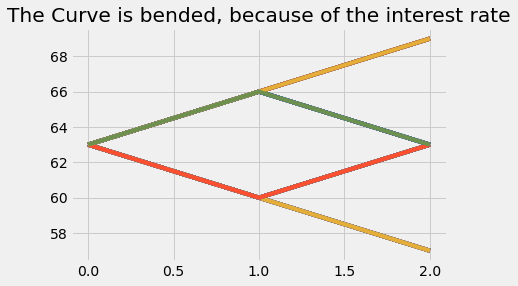

In [19]:
a = 63
S = a
E = 61 # strike price
T = 0.5
TimeStep =2
dt = T/TimeStep
r = 0.04


N = 100
S_list_all = []
for i in range(N):
    S = a
    S_list_each = [S]
    for j in range(TimeStep):
        S += np.random.choice([3,-3])
        S_list_each.append(S)
    S_list_all.append(S_list_each)
    
Price_matrix = np.vstack(S_list_all)
Price_matrix = np.round(Price_matrix,2)
plt.figure()
plt.plot( Price_matrix.T )
plt.title('The Curve is bended, because of the interest rate')
plt.show()

In [20]:
Payoff_matrix = np.zeros(Price_matrix.shape)
Payoff_matrix = E - Price_matrix
Payoff_matrix = np.round(Payoff_matrix,2)
# plt.figure()
# plt.plot( Payoff_matrix.T )
# plt.title('Payoff Matrix')
# plt.show()

# reforming the payoff matrix
payoff_node = np.zeros([ len(np.unique(Payoff_matrix[:,TimeStep])),TimeStep+1])
# row is nodes number, col is timestep number
price_node = np.zeros([ len(np.unique(Price_matrix[:,TimeStep])),TimeStep+1])


for i in range(TimeStep,0,-1):
#     sorted_payoff = np.sort(np.unique(Payoff_matrix[:,i]))
    sorted_payoff = np.sort(np.unique(Payoff_matrix[:,i]))[::-1] # put option, sort in a descending order
    sorted_price = np.sort(np.unique(Price_matrix[:,i]))
    payoff_node[0:len(sorted_payoff),i] = sorted_payoff
    price_node[0:len(sorted_price),i] = sorted_price
    
price_node[0,0] = Price_matrix[0,0]
print(payoff_node)
print(price_node)

[[ 0.  1.  4.]
 [ 0. -5. -2.]
 [ 0.  0. -8.]]
[[63. 60. 57.]
 [ 0. 66. 63.]
 [ 0.  0. 69.]]


In [21]:
payoff_node = np.maximum(payoff_node,0)
v_node = np.zeros(price_node.shape)
v_node[:,TimeStep] = payoff_node[:,TimeStep]
for i in range(TimeStep,0,-1):
    for j in range((price_node[:,i]!=0).sum(),1,-1):
        s_down, s_up = price_node[j-2:j,i]
        v_down, v_up = v_node[j-2:j,i]

        delta_temp = (v_up - v_down)/(s_up - s_down)
        s_pre = price_node[j-2,i-1]
        v = np.exp(-r*dt)*( v_up - delta_temp * s_up ) + s_pre*delta_temp
#         v = ( 1/(1+r/TimeStep) ) *( v_up - delta_temp * s_up ) + s_pre*delta_temp
        if v_node[j-2,i-1] > v:
            v = v_node[j-2,i-1] 
        v_node[j-2,i-1] = v
print(v_node)

[[0.61788353 1.58209302 4.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]


# 8. Two-Step Binomial Tree

Apply code in Q6

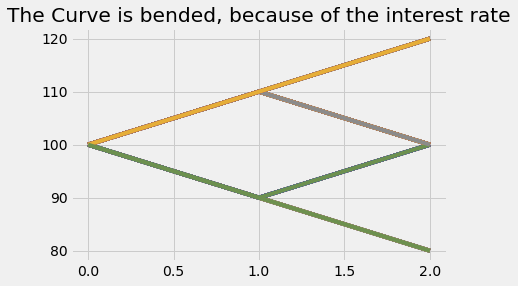

In [22]:
a = 100
S = a
E = a + 5 # strike price
T = 1
SD = 0.2 # given in the spreadsheet
TimeStep =2
dt = T/TimeStep
r = 0


N = 100
S_list_all = []
for i in range(N):
    S = a
    S_list_each = [S]
    for j in range(TimeStep):
        S += np.random.choice([10,-10])
        S_list_each.append(S)
    S_list_all.append(S_list_each)
    
Price_matrix = np.vstack(S_list_all)
Price_matrix = np.round(Price_matrix,2)
plt.figure()
plt.plot( Price_matrix.T )
plt.title('The Curve is bended, because of the interest rate')
plt.show()

In [23]:
Payoff_matrix = np.zeros(Price_matrix.shape)
Payoff_matrix = Price_matrix - E
Payoff_matrix = np.round(Payoff_matrix,2)
# plt.figure()
# plt.plot( Payoff_matrix.T )
# plt.title('Payoff Matrix')
# plt.show()

# reforming the payoff matrix

payoff_node = np.zeros([ len(np.unique(Payoff_matrix[:,TimeStep])),TimeStep+1])
# row is nodes number, col is timestep number
price_node = np.zeros([ len(np.unique(Price_matrix[:,TimeStep])),TimeStep+1])


for i in range(TimeStep,0,-1):
    sorted_payoff = np.sort(np.unique(Payoff_matrix[:,i]))
    sorted_price = np.sort(np.unique(Price_matrix[:,i]))
    payoff_node[0:len(sorted_payoff),i] = sorted_payoff
    price_node[0:len(sorted_price),i] = sorted_price
    
price_node[0,0] = Price_matrix[0,0]
print(payoff_node)
print(price_node)

[[  0. -15. -25.]
 [  0.   5.  -5.]
 [  0.   0.  15.]]
[[100.  90.  80.]
 [  0. 110. 100.]
 [  0.   0. 120.]]


In [24]:
payoff_node = np.maximum(payoff_node,0)
v_node = np.zeros(price_node.shape)
v_node[:,TimeStep] = payoff_node[:,TimeStep]
for i in range(TimeStep,0,-1):
    for j in range((price_node[:,i]!=0).sum(),1,-1):
        s_down, s_up = price_node[j-2:j,i]
        v_down, v_up = v_node[j-2:j,i]

        delta_temp = (v_up - v_down)/(s_up - s_down)
        s_pre = price_node[j-2,i-1]
#         v = np.exp(-r/TimeStep)*( v_up - delta_temp * s_up ) + s_pre*delta_temp
        v = ( 1/(1+r * dt) ) *( v_up - delta_temp * s_up ) + s_pre*delta_temp
        if v_node[j-2,i-1] > v:
            v = v_node[j-2,i-1] 
        v_node[j-2,i-1] = v
print(v_node)

[[ 3.75  0.    0.  ]
 [ 0.    7.5   0.  ]
 [ 0.    0.   15.  ]]
